In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl
from sklearn.cross_validation import train_test_split

In [4]:
Train = pd.read_csv("Insight_Train_DC.csv")

In [5]:
Train.columns

Index([u'LB', u'AC', u'FM', u'UC', u'DL', u'DS', u'DP', u'ASTV', u'MSTV',
       u'ALTV', u'MLTV', u'Width', u'Min', u'Max', u'Nmax', u'Nzeros', u'Mode',
       u'Mean', u'Median', u'Variance', u'Tendency', u'NSP'],
      dtype='object')

In [6]:
Train.NSP.value_counts()

1    1408
2     154
3     137
dtype: int64

In [7]:
Train.isnull().sum().sum()

54

In [8]:
Train = Train.fillna(0)

In [9]:
Only1 = Train[(Train.NSP == 1)]
len(Only1)

1408

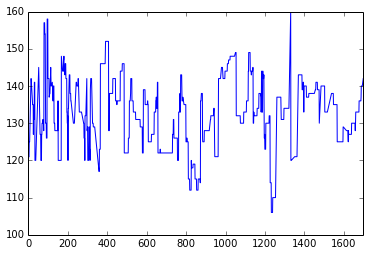

In [10]:
Only1.LB.plot()

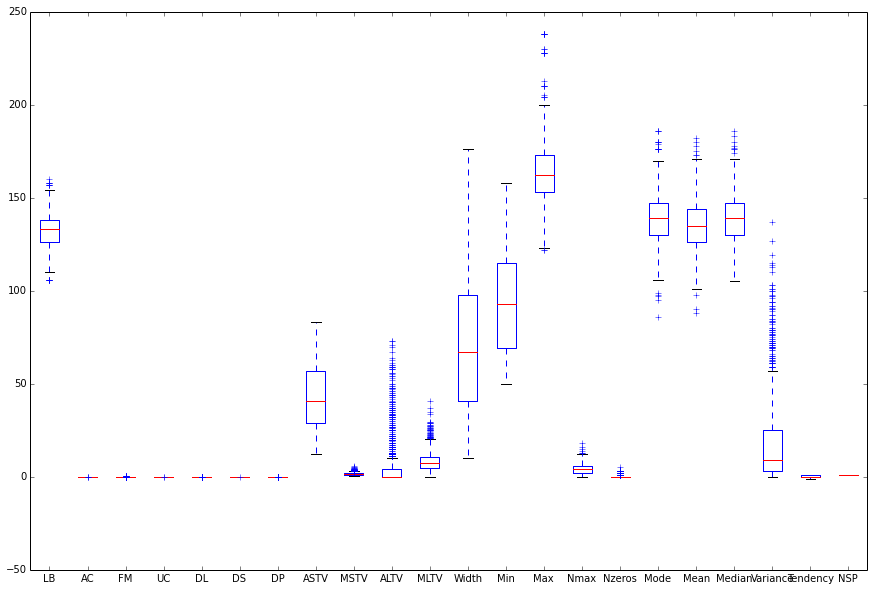

In [11]:
Only1.plot(kind = 'box',figsize=(15,10))

In [12]:
Features = Train.iloc[:,:-1]
Values = Train.iloc[:,-1]

In [13]:
Features_train, Features_test, Values_train, Values_test = train_test_split(Features, Values, test_size = 0.3, random_state = 34)

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(Features_train, Values_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [15]:
clf.score(Features_test,Values_test)

0.92367906066536198

In [16]:
y_pred = clf.predict(Features_test)

In [17]:
from sklearn import metrics
###top is predicted, left is correct
metrics.confusion_matrix(Values_test,y_pred)

array([[428,   0,   5],
       [ 30,  13,   0],
       [  2,   2,  31]])

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1000)
clf.fit(Features_train, Values_train)
clf.score(Features_test,Values_test)

y_pred = clf.predict(Features_test)

print clf.score(Features_test,Values_test)

print metrics.confusion_matrix(Values_test,y_pred)

print clf.feature_importances_

0.968688845401
[[431   1   1]
 [ 11  31   1]
 [  1   1  33]]
[ 0.03619029  0.01733148  0.01169648  0.02586994  0.01210546  0.0015407
  0.0208172   0.10001708  0.04075887  0.07124666  0.03249302  0.0344255
  0.03806891  0.03825515  0.01986067  0.00606825  0.02618959  0.03569128
  0.03058557  0.02425968  0.00502824]


In [19]:
Test = pd.read_csv('Insight_Test_DC.csv')

In [20]:
TestFeatures = Test.iloc[:,:-1]
TestValues = Test.iloc[:,-1]



test_pred = clf.predict(TestFeatures)
print clf.score(TestFeatures,TestValues)

print metrics.confusion_matrix(TestValues,test_pred)

0.899297423888
[[231  16   0]
 [ 23 118   0]
 [  0   4  35]]
